In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# Loading the dataset:

In [2]:
df = pd.read_csv('data\House Price Prediction Dataset.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (2000, 10)


## Checking Missing Values:

In [4]:
df.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

## Checking Duplicated Rows

In [5]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


## Checking Data Type:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


## Checking the number of unique values of each column:

In [7]:
df.nunique()

Id           2000
Area         1622
Bedrooms        5
Bathrooms       4
Floors          3
YearBuilt     124
Location        4
Condition       4
Garage          2
Price        1999
dtype: int64

## Checking statistics of dataset:

In [8]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


## Define numerical & categorical columns:

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']

We have 3 categorical features : ['Location', 'Condition', 'Garage']


# Exploring Data ( Visualization )

### Distribution of number of Bedrooms and Bathrooms:

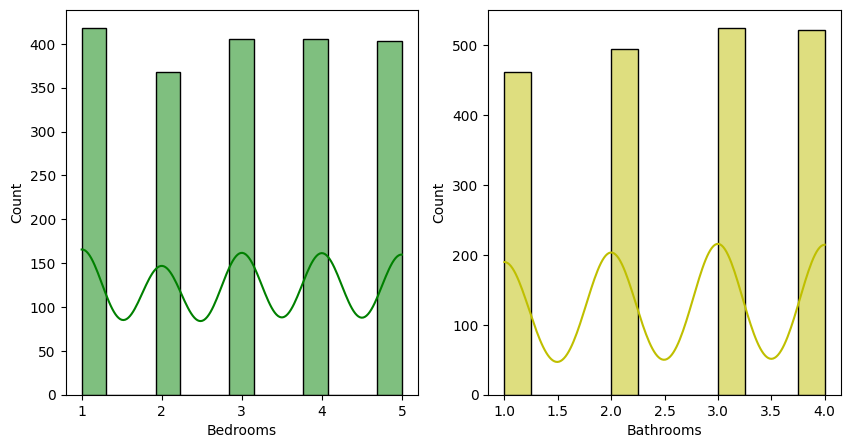

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='Bedrooms',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Bathrooms',kde=True,color= 'y')
plt.show()

### HOUSES OVER TIME:

In [12]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['YearBuilt'].apply(get_decade)

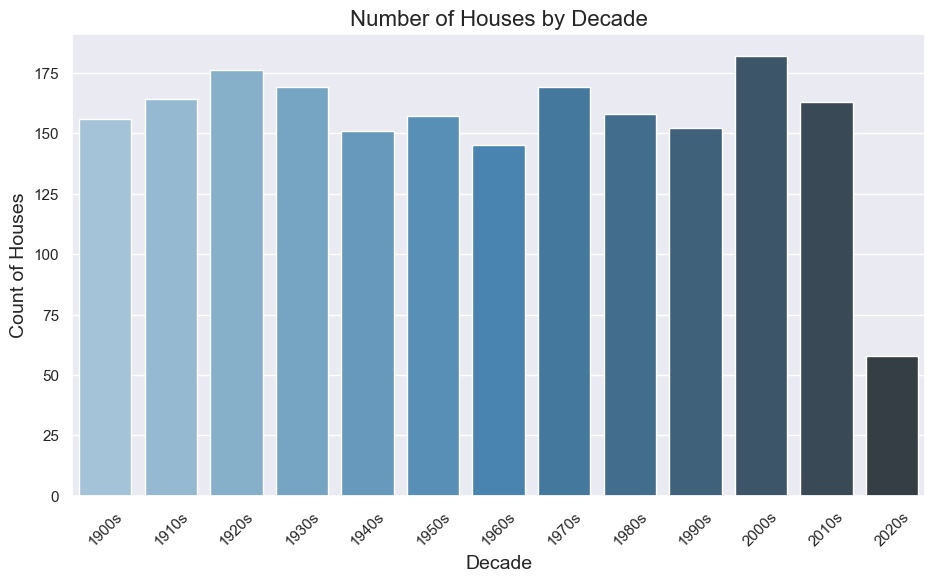

In [13]:
# Set figure size and style
sns.set(rc={'figure.figsize':(11, 6)})

# Create a countplot for the 'Decade' column
plt.figure(figsize=(11, 6))  # Setting figure size manually (if needed)
ax = sns.countplot(x='decade', data=df, palette="Blues_d", order=sorted(df['decade'].unique()))

# Add title and labels
ax.set_title('Number of Houses by Decade', fontsize=16)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Count of Houses', fontsize=14)


# Display the plot
plt.xticks(rotation=45)
plt.show()

### Price of Houses Over Time:

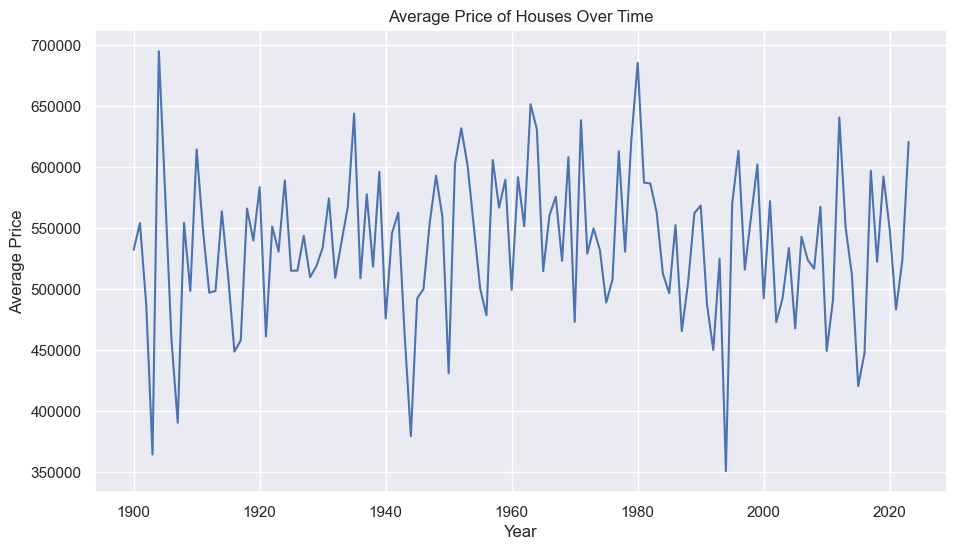

In [14]:
avg_price = df.groupby('YearBuilt')['Price'].mean()
plt.plot(avg_price)
plt.title('Average Price of Houses Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

### Correlation Heatmap of numerical Features:

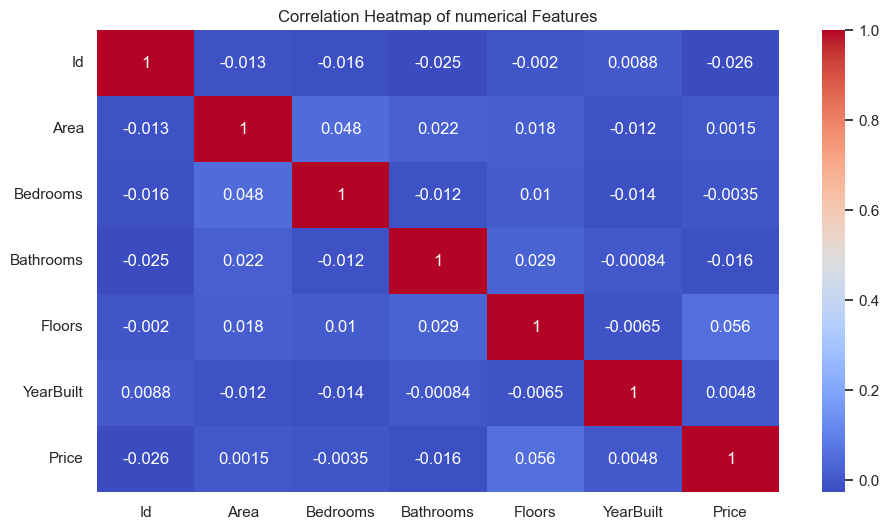

In [15]:
corr = df[['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of numerical Features')
plt.show()

### Distribution of House Prices:

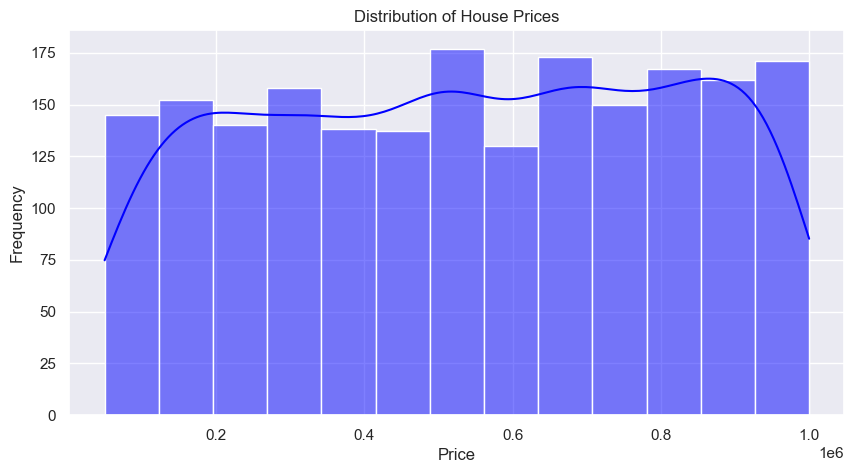

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


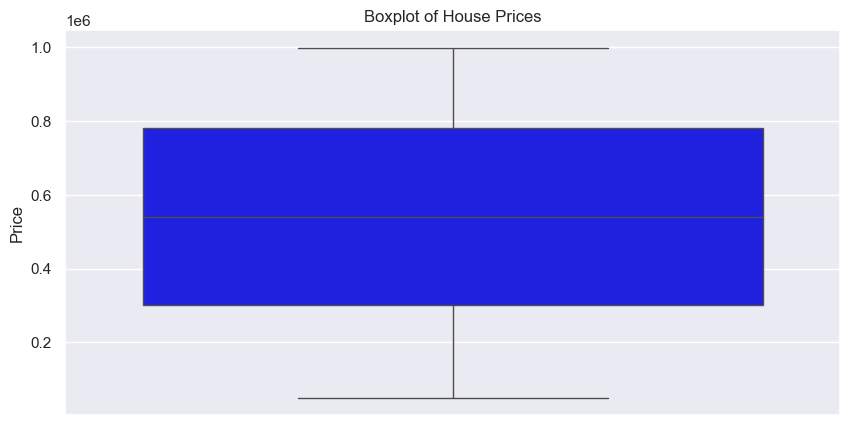

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['Price'], color='blue')
plt.title('Boxplot of House Prices')
plt.ylabel('Price')
plt.show()


### Price vs. Floors

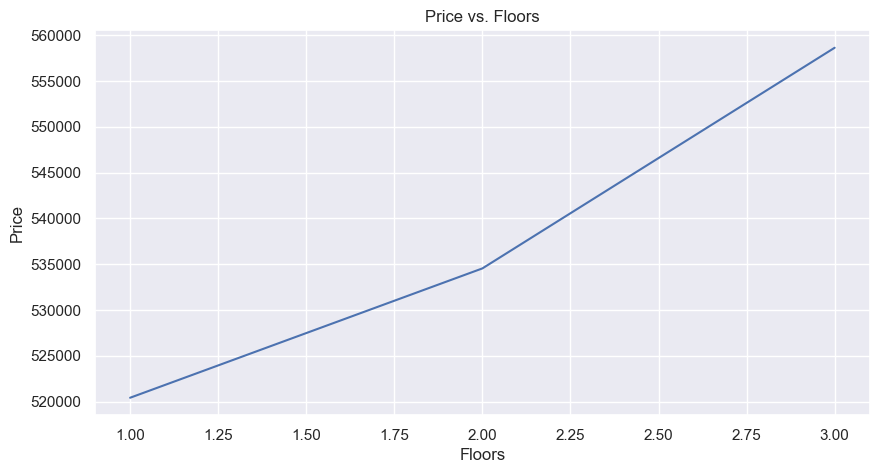

In [18]:
avg_area = df.groupby('Floors')['Price'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_area)
plt.title('Price vs. Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()


### Price vs. Bathrooms

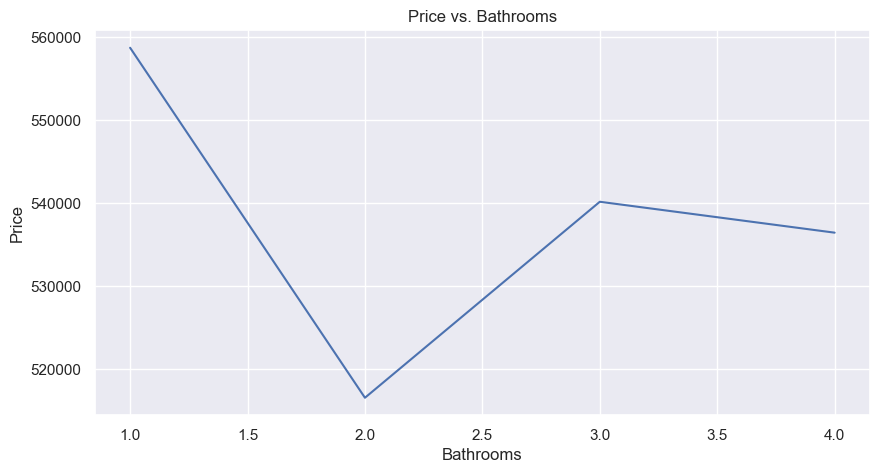

In [27]:
avg_Bathrooms = df.groupby('Bathrooms')['Price'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_Bathrooms)
plt.title('Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

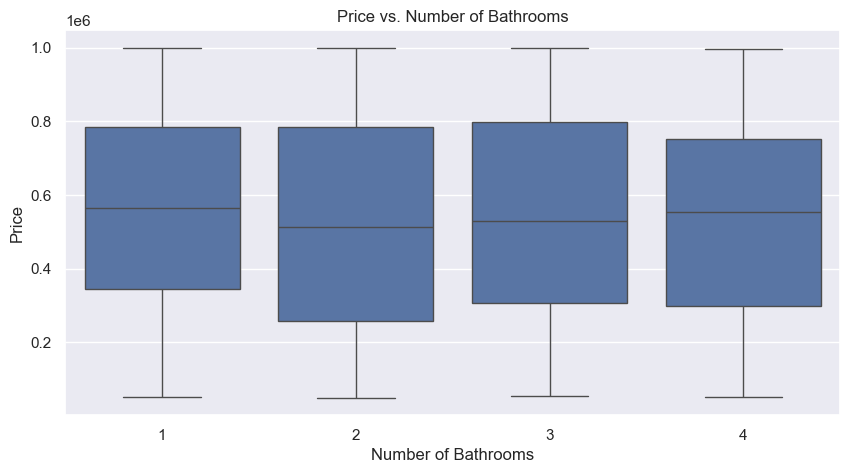

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Bathrooms', y='Price', data=df)
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

### Price vs. Bedrooms:

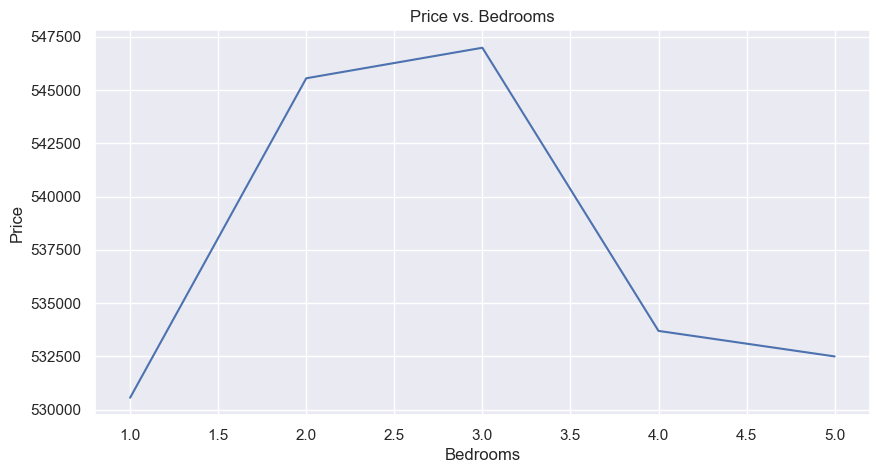

In [28]:
avg_Bedrooms = df.groupby('Bedrooms')['Price'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_Bedrooms)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

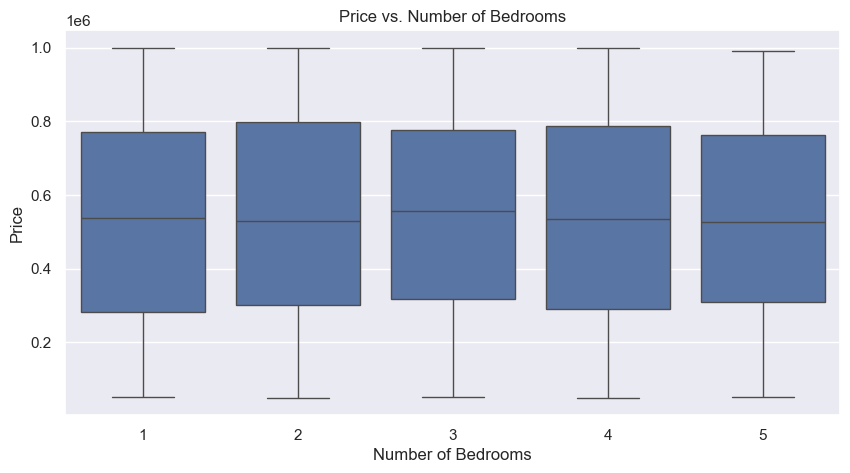

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


### Price vs Garage:

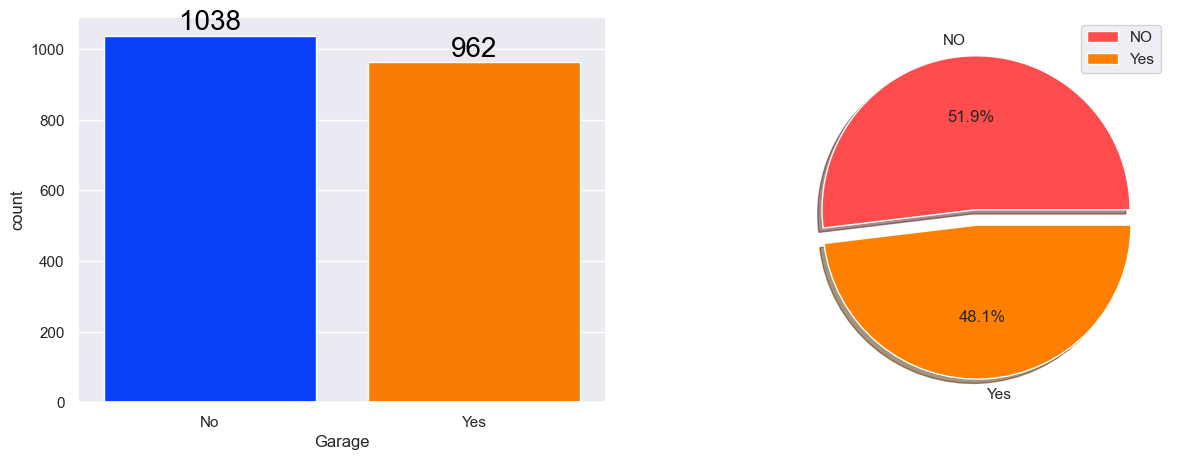

In [33]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['Garage'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Garage'].value_counts(),labels=['NO','Yes'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.legend()
plt.show()

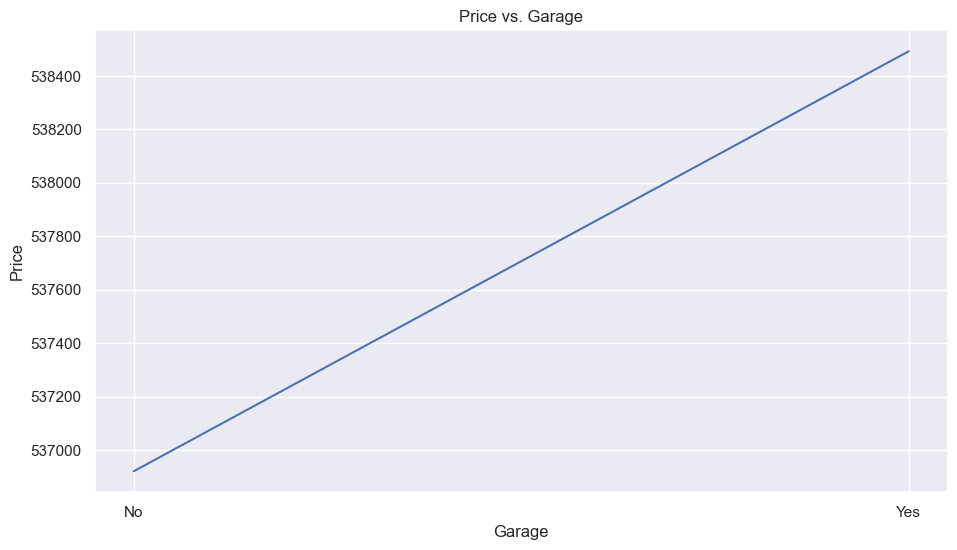

In [37]:
# Scatter plot of price vs.  garages
garage = df.groupby('Garage')['Price'].mean()
plt.plot(garage)
plt.title('Price vs. Garage')
plt.xlabel('Garage')
plt.ylabel('Price')
plt.show()

### Price vs Location:

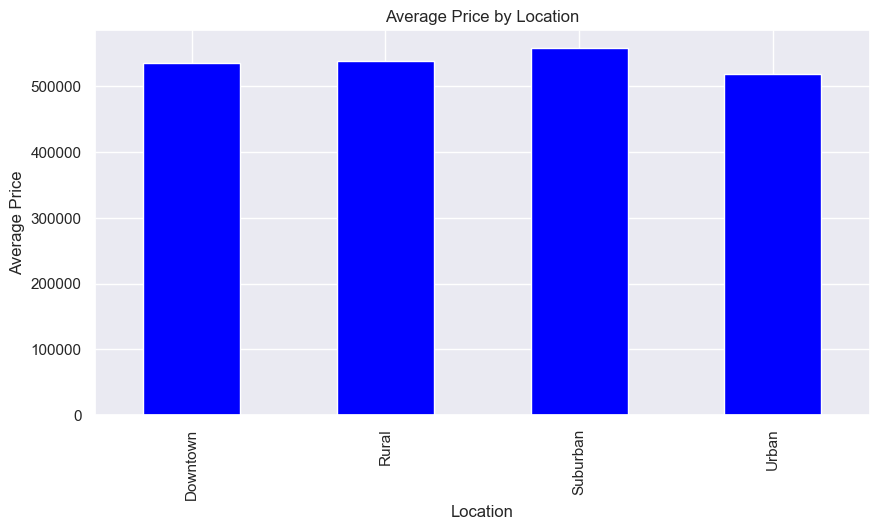

In [41]:
# Group by location and calculate the mean price
Location = df.groupby('Location')['Price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 5))
Location.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')

# Display the plot
plt.show()


### Price vs Condition:

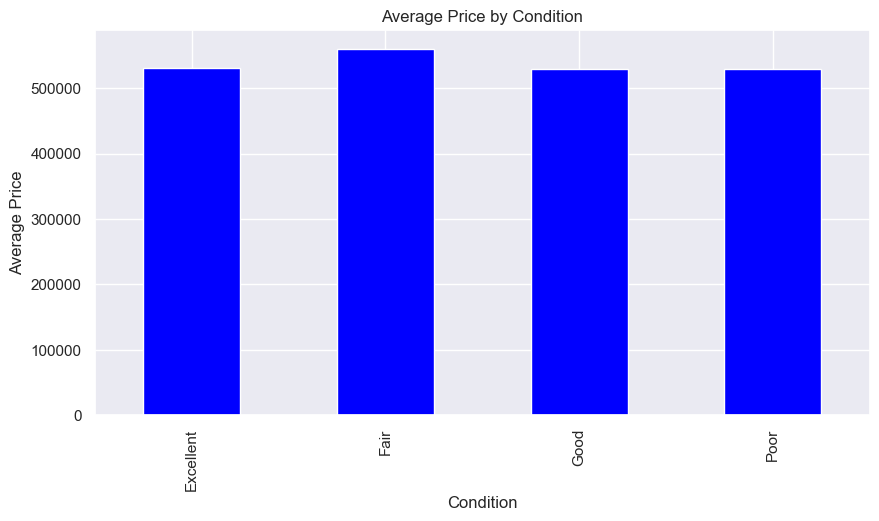

In [42]:
# Group by location and calculate the mean price
condition = df.groupby('Condition')['Price'].mean()

# Create a bar plot
plt.figure(figsize=(10, 5))
condition.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')

# Display the plot
plt.show()